# Homework 2 - Predicting School Performance

----

Objetivo deste trabalho é prever a performance de colégios brasileiros no exame ENEM.
Para realizar a previsão, diferentes fontes de dados serão utilizadas para prever
a performance dos estudantes no ENEM de 2015.

### Datasets:
O dataset é composto de três arquivos principais:
- ENEM2015.csv: contém a classificação das escolas no ENEM 2015, dado que nosso modelo tentará prever;
- DadosEscolares1996-2015.csv: contém informações como total de alunos matriculados e quantidade de classes;
- ESC2013_RMSP_CEM.csv: contém informações gerais das escolas de ensino médio no Brasil. Informações como
taxas de aprovação, notas no IDEB, notas passadas no ENEM, etc;
- RendimentoEscolar2000-2015.csv: contém informações escolares como quantidade de abandonos, alunos aprovados,
entre outros.

### Overview:

Neste Notebook iremos fazer uma breve exploração dos nossos dados para identificar a qualidade da informação
e como estão estruturadados os datasets. Com o auxílio de dicionários fornecidos junto aos dados,
algumas das variáveis serão escolhidas para serem estudadas mais profundamente e serem utilizadas de fato
no modelo final.

Os dados serão apendados junto ao dataframe do arquivo ENEM2015, que serão os dados nos quais iremos treinar
e testar nosso modelo.

### Evaluation:

A qualidade do modelo será avaliada utilizando o método de K-Fold Cross-Validation, utilizando 5 folds.
A métrica utilizada será o % de acerto, já que temos um modelo de classificação.


---
# 0. Importing Libraries and Datasets


In [14]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
import missingno as msno
import pandas_profiling
pd.options.display.max_columns = None

enem  = pd.read_csv('./Data/ENEM2015.csv')
esc   = pd.read_csv('./Data/ESC2013_RMSP_CEM.csv') 
rendimento = pd.read_csv('./Data/RendimentoEscolar2000-2015.csv')
dadosescolares  = pd.read_csv('./Data/DadosEscolares1996-2015.csv',low_memory=False)

/home/davi/Envs/datascience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


----
# 1. Data Exploration


### 1.1 ENEM2015

Como a base ENEM2015 contém poucos dados, podemos utilizar direto a função profile_report()
da biblioteca pandas_profiling.

In [13]:
enem.profile_report()

### 1.2  DadosEscolares1996-2015


In [18]:
dadosescolares.head()

,CODMEC,CODEOL,ANO,TIPOESC,NOME,DEP,DEPADM,SITUAÃ‡ÃƒO,MAIS EDUCAÃ‡ÃƒO,Qtde_Docentes,NUM_FUNC,MERENDA,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,DTURNOS - EMEF,T2D3D - EMEF,DTURNOS-EMEI,T2D3D - EMEI,CL_CRECHE,CL_PRE,AL_CRECHE,AL_PRE,0,1,2,MENOR3,3,4,5,6,6fund,0A3,0A4,4A6,5A6,>6,TotalEdInf,CLEM1S,CLEM2S,CLEM3S,CLEM4S,CLEMMU,ALEM1S,ALEM2S,ALEM3S,ALEM4S,ALEMMU,CLEM,ALEM,CLEF1S,CLEF2S,CLEF3S,CLEF4S,CLEF5S,CLEF6S,CLEF7S,CLEF8S,CLEFMU,ALEF1S,ALEF2S,ALEF3S,ALEF4S,ALEF5S,ALEF6S,ALEF7S,ALEF8S,ALEFMU,ALEFAC,CLEF1A4,CLEF5A8,CLEF1A8,ALEF1A4,ALEF5A8,ALEF1A8,CLE9F1S,CLE9F2S,CLE9F3S,CLE9F4S,CLE9F5S,CLE9F6S,CLE9F7S,CLE9F8S,CLE9F9S,CLE9FMU,ALE9F1S,ALE9F2S,ALE9F3S,ALE9F4S,ALE9F5S,ALE9F6S,ALE9F7S,ALE9F8S,ALE9F9S,ALE9FMU,ALE9FAC,CLE9F1A5,CLE9F6A9,ALE9F1A5,ALE9F6A9,CLE9F1A9,ALE9F1A9,CLFUNDI,ALFUNDI,CLFUNDII,ALFUNDII,CLFUND,ALFUND,TEG,TIPOENSEJA,CLEJA1A4,CLEJA5A8,CLEJAMED,ALEJA1A4,ALEJA5A8,ALEJAMED,TOTALEJA,ALES1A4_SEMI,ALES5A8_SEMI,ALESMED_SEMI,ALES1A8_EXAME,ALESMED_EXAME,ALEDPROF,EE_VIS_MED,EE_BVIS_MED,EE_INTELECTUAL_MED,EE_AUD_MED,EE_BAUD_MED,EE_Surdo_Cegueira_MED,EE_FIS_MED,EE_MEN_MED,EE_Transtornos_MED,EE_Down_MED,EE_MUL_MED,EE_SUP_MED,EE_Autismo_MED,EE_Asperger_MED,EE_Ret_MED,EE_TDI_MED,EE_CON_MED,EE_OUT_MED,TOT_EE_MED,EE_VIS_CRE,EE_BVIS_CRE,EE_INTELECTUAL_CRE,EE_AUD_CRE,EE_BAUD_CRE,EE_Surdo_Cegueira_CRE,EE_FIS_CRE,EE_MEN_CRE,EE_Transtornos_CRE,EE_Down_CRE,EE_MUL_CRE,EE_SUP_CRE,EE_Autismo_CRE,EE_Asperger_CRE,EE_Ret_CRE,EE_TDI_CRE,EE_CON_CRE,EE_OUT_CRE,TOT_EE_CRE,EE_VIS_FUND,EE_BVIS_FUND,EE_INTELECTUAL_FUND,EE_AUD_FUND,EE_BAUD_FUND,EE_Surdo_Cegueira_FUND,EE_FIS_FUND,EE_MEN_FUND,EE_Transtornos_FUND,EE_Down_FUND,EE_MUL_FUND,EE_SUP_FUND,EE_Autismo_FUND,EE_Asperger_FUND,EE_Ret_FUND,EE_TDI_FUND,EE_CON_FUND,EE_OUT_FUND,TOT_EE_FUND,EE_VIS_EJA,EE_BVIS_EJA,EE_INTELECTUAL_EJA,EE_AUD_EJA,EE_BAUD_EJA,EE_Surdo_Cegueira_EJA,EE_FIS_EJA,EE_MEN_EJA,EE_Transtornos_EJA,EE_Down_EJA,EE_MUL_EJA,EE_SUP_EJA,EE_Autismo_EJA,EE_Asperger_EJA,EE_Ret_EJA,EE_TDI_EJA,EE_CON_EJA,EE_OUT_EJA,TOT_EE_EJA,EE_VIS_EP,EE_BVIS_EP,EE_INTELECTUAL_EP,EE_AUD_EP,EE_BAUD_EP,EE_Surdo_Cegueira_EP,EE_FIS_EP,EE_MEN_EP,EE_Transtornos_EP,EE_Down_EP,EE_MUL_EP,EE_SUP_EP,EE_Autismo_EP,EE_Asperger_EP,EE_Ret_EP,EE_TDI_EP,EE_CON_EP,EE_OUT_EP,TOT_EE_EP,EE_VIS_PRE,EE_BVIS_PRE,EE_AUD_PRE,EE_BAUD_PRE,EE_INTELECTUAL_PRE,EE_Surdo_Cegueira_PRE,EE_FIS_PRE,EE_MEN_PRE,EE_Transtornos_PRE,EE_Down_PRE,EE_MUL_PRE,EE_SUP_PRE,EE_Autismo_PRE,EE_Asperger_PRE,EE_Ret_PRE,EE_TDI_PRE,EE_CON_PRE,EE_OUT_PRE,TOT_EE_PRE,TOT_EE,TIPO_EE,EE_Creche,EE_Pre,EE_Fund,EE_Med,EE_EJA,EE_EP,ALEDESP,TOTAL_ALUNOS
0,35191292,306602.0,2005,PARINF,FIFO ESCOLA DE EDUCACAO INFANTIL,Privada,Privada,NaN,NaN,NaN,NaN,NaN,5404.0,MORUMBI,BUTANTA,BUTANTA,OESTE,NaN,NaN,NaN,NaN,0.0,2.0,0.0,6.0,NaN,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,6.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6
1,35055347,95401.0,2004,EMEF,"PRUDENTE DE MORAIS, PRES. ,EMEF",Municipal,PÃºblica,NaN,NaN,NaN,NaN,NaN,7201.0,SAO LUCAS,VILA PRUDENTE/SAPOPEMBA,IPIRANGA,LESTE,MT,2D,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,0.0,101.0,114.0,128.0,125.0,108.0,125.0,124.0,121.0,0.0,0.0,15.0,15.0,3

In [17]:
print('Total de colunas:')
len(dadosescolares.columns)

Total de colunas:


249

Visualizando os dados faltantes

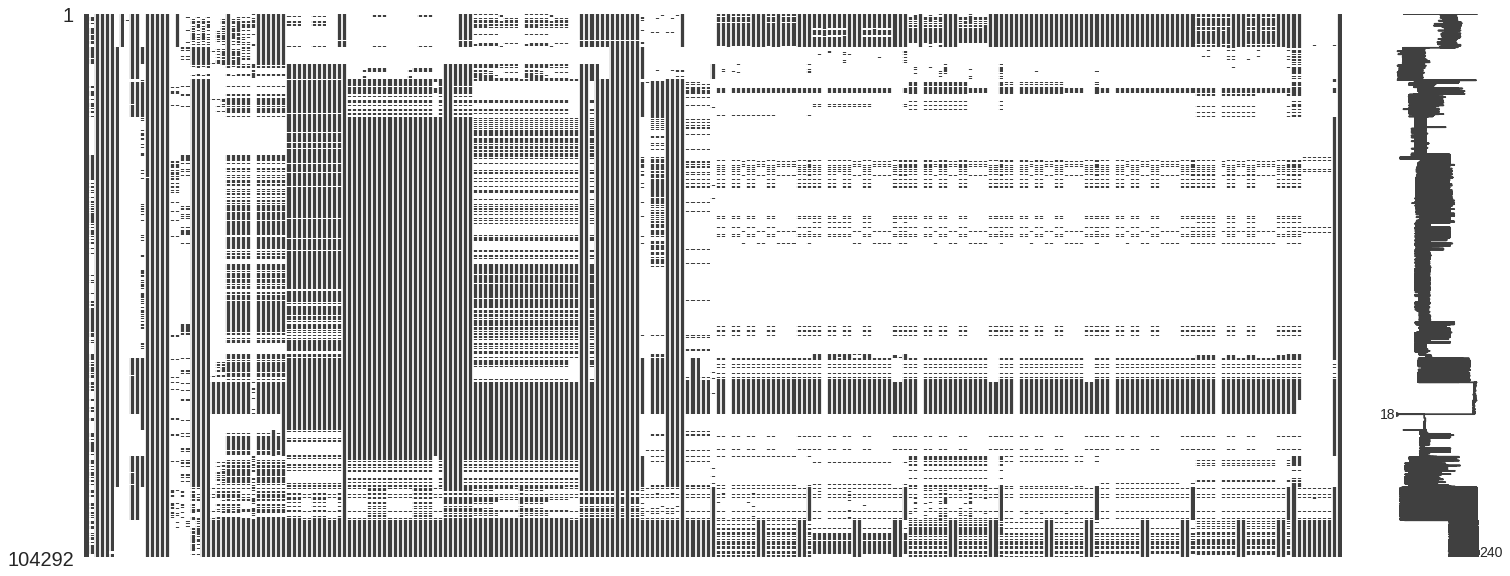

In [19]:
msno.matrix(dadosescolares)

Vamos filtrar as colunas com menos de 30% das observações.

In [39]:
null_filter = []
k = 0
for i in dadosescolares.count()/dadosescolares.count()[0]:
    if i <=0.3: null_filter.append(k)
    k+=1
dadosescolares.drop(dadosescolares.columns[null_filter],axis=1,inplace=True)

119

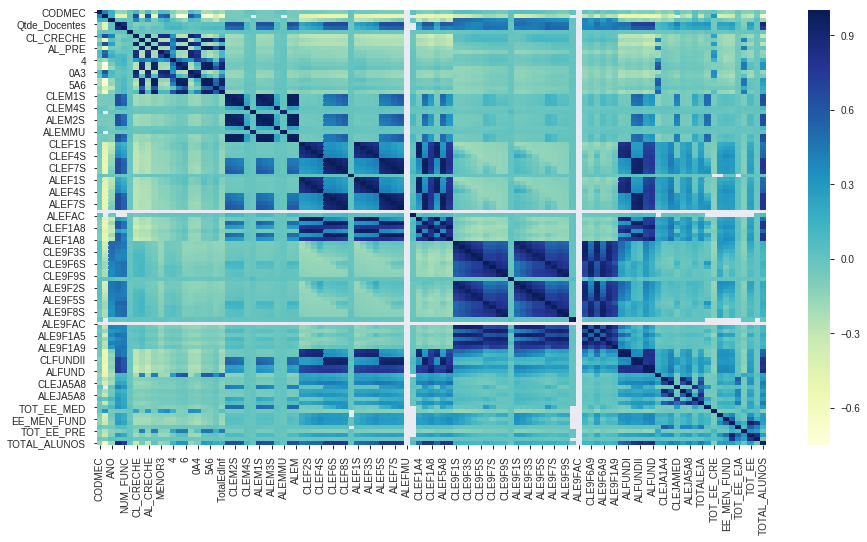

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(dadosescolares.corr(),cmap='YlGnBu')
len(dadosescolares.columns)

In [50]:
colunas_selecionadas = 'CODMEC,TIPOESC,DEP,SITUACAO,MAIS EDUCAÇÃO,Qtde_Docentes,NUM_FUNC,MERENDA,TotalEdInf,CLEM3S,CLEM4S,CLEMMU,ALEM3S,ALEM4S,ALEMMU,CLEM,ALEM'
colunas_selecionadas = colunas_selecionadas.split(',')

In [51]:
nome_errado = dadosescolares.columns[8]
dadosescolares.rename(columns={nome_errado:'MAIS EDUCAÇÃO'},inplace=True)
nome_errado = dadosescolares.columns[7]
dadosescolares.rename(columns={nome_errado:'SITUACAO'},inplace=True)

In [52]:
dadosescolares = dadosescolares[colunas_selecionadas]

KeyError: "['NUM_FUNC', 'Qtde_Docentes'] not in index"

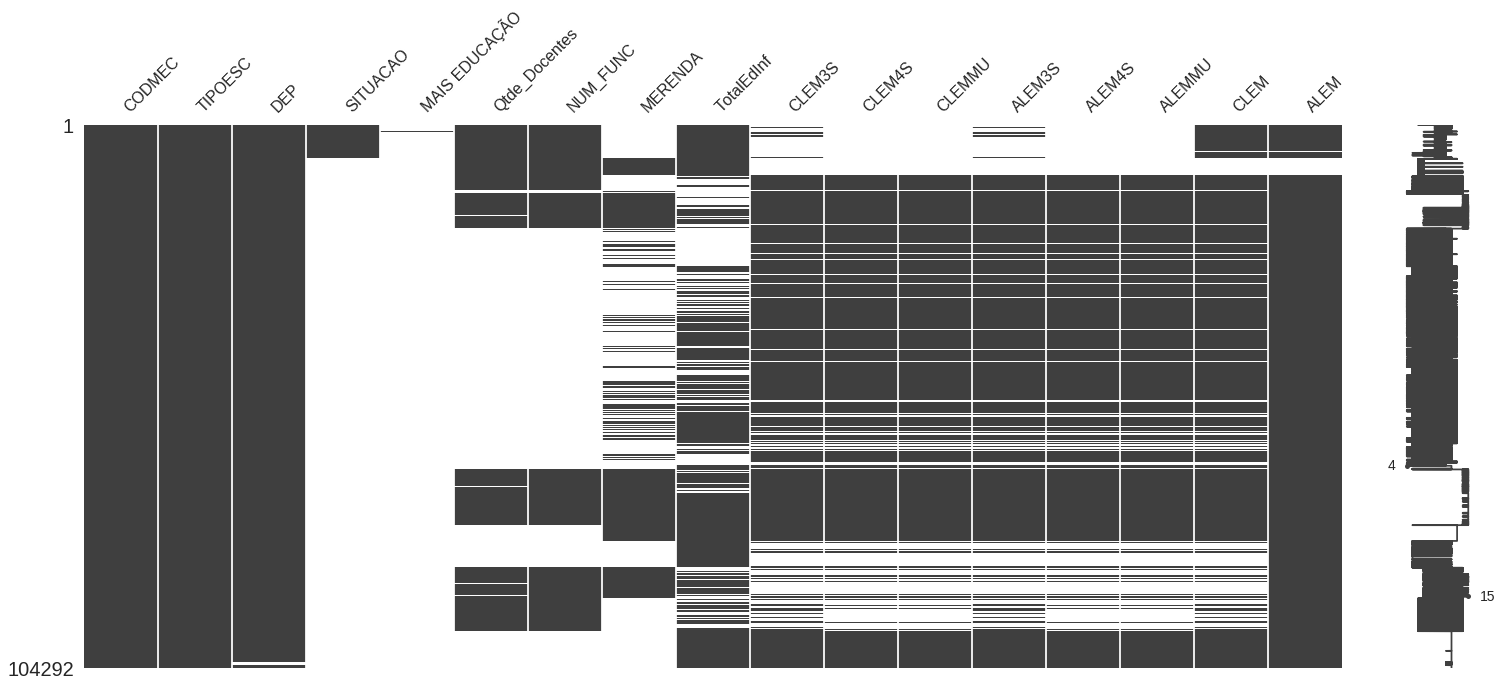

In [65]:
# colunas_selecionadas = '''CODMEC,ANO,DEP,TOTALEF_ABAND,TOTALEF_APROV,TOTALEF_REPROV,CONCLUINTES_EF,TOTAL_EM_APROV,CONCLUINTES_EM,CONCLUINTES_EJA,EPAPROV,EPREPROV'''
# colunas_selecionadas = colunas_selecionadas.split(',')


In [156]:
rendimento.columns[9]
col_efaband = list(rendimento.columns[9:9+17])
col_efaprov = list(rendimento.columns[27:27+17])
col_efreprov= list(rendimento.columns[45:45+17])

col_emaband  = list(rendimento.columns[64:64+4])
col_emreprov = list(rendimento.columns[69:69+4])
col_emaprov  = list(rendimento.columns[74:74+4])

col_sig = col_efaband + col_efaprov + col_efreprov + col_emaband + col_emreprov + col_emaprov

In [186]:
rendimento['total_ef'] = rendimento[col_efaband + col_efaprov + col_efreprov].sum(axis=1)
rendimento['ef_aband'] = rendimento[col_efaband].sum(axis=1)
rendimento['ef_aprov'] = rendimento[col_efaprov].sum(axis=1)
rendimento['ef_reprov'] = rendimento[col_efreprov].sum(axis=1)
rendimento['total_em'] = rendimento[col_emaband + col_emaprov + col_emreprov].sum(axis=1)
rendimento['em_aband'] = rendimento[col_emaband].sum(axis=1)
rendimento['em_aprov'] = rendimento[col_emaprov].sum(axis=1)
rendimento['em_reprov'] = rendimento[col_emreprov].sum(axis=1)

In [195]:
colunas_selecionadas = 'CODMEC,ANO,DEP,total_ef,ef_aband,ef_aprov,ef_reprov,total_em,em_aband,em_aprov,em_reprov'
colunas_selecionadas = colunas_selecionadas.split(',')
rendimento = rendimento[colunas_selecionadas]

In [69]:
# colunas_selecionadas = 'CODMEC'
# rendimento = rendimento[colunas_selecionadas]
# rendimento

,CODMEC,ANO,DEP,TOTALEF_ABAND,TOTALEF_APROV,TOTALEF_REPROV,CONCLUINTES_EF,TOTAL_EM_APROV,CONCLUINTES_EM,CONCLUINTES_EJA,EPAPROV,EPREPROV
0,35053107,2014,MUNICIPAL,0,0,0,0,0,0,65,0,0
1,35053119,2014,MUNICIPAL,0,0,0,0,0,0,103,0,0
2,35053120,2014,MUNICIPAL,0,0,0,0,0,0,65,0,0
3,35053132,2014,MUNICIPAL,0,0,0,0,0,0,110,0,0
4,35053144,2014,MUNICIPAL,0,0,0,0,0,0,0,0,0
5,35053156,2014,MUNICIPAL,0,0,0,0,0,0,50,0,0
6,35053168,2014,MUNICIPAL,0,0,0,0,0,0,0,0,0
7,35053173,2014,MUNICIPAL,0,0,0,0,0,0,0,0,0
8,35053181,2014,MUNICIPAL,0,0,0,0,0,0,0,0,0
9,35053193,2014,MUNICIPAL,0,0,0,0,0,0,0,0,0


In [13]:
rendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14944 entries, 0 to 14943
Data columns (total 93 columns):
CODMEC             14944 non-null int64
ANO                14944 non-null int64
DEP                14944 non-null object
NOME               14944 non-null object
SETEDU             14944 non-null object
DISTRITO07         14944 non-null object
SUBPREF            14944 non-null object
CORED              14944 non-null object
ZONA               14944 non-null object
EFABAND9ANOS1S     14944 non-null int64
EFABAND9ANOS2S     14944 non-null int64
EFABAND9ANOS3S     14944 non-null int64
EFABAND9ANOS4S     14944 non-null int64
EFABAND9ANOS5S     14944 non-null int64
EFABAND9ANOS6S     14944 non-null int64
EFABAND9ANOS7S     14944 non-null int64
EFABAND9ANOS8S     14944 non-null int64
EFABAND9ANOS9S     14944 non-null int64
EFABAND1S          14944 non-null int64
EFABAND2S          14944 non-null int64
EFABAND3S          14944 non-null int64
EFABAND4S          14944 non-null int64
EFAB

In [12]:
esc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10937 entries, 0 to 10936
Columns: 136 entries, ID to INSE_CL
dtypes: float64(90), int64(36), object(10)
memory usage: 11.3+ MB


In [196]:
'CODESC,COD_DEP,TIP_DEP,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,'
esc

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,REG_IN_CR,REG_IN_PE,REG_FU_8A,REG_FU_9A,REG_MED,REG_MED_I,REG_MED_N,REG_MED_P,ENS_ESP,ESP_IN_CR,ESP_IN_PE,ESP_FU_8A,ESP_FU_9A,ESP_MED,ESP_MED_I,ESP_MED_N,ESP_MED_P,ESP_EJA_F,ESP_EJA_M,EJA,EJA_FUND,EJA_MED,EJA_PROJ,AP5EF_07,AP9EF_07,AP3EM_07,AB1EM_07,AP5EF_08,AP9EF_08,AP3EM_08,AB1EM_08,AP5EF_09,AP9EF_09,AP3EM_09,AB1EM_09,AP5EF_10,AP9EF_10,AP3EM_10,AB1EM_10,AP5EF_11,AP9EF_11,APR3EM_11,AB1EM_11,AP5EF_12,AP9EF_12,AP3EM_12,AB1EM_12,AP5EF_13,AP9EF_13,AP3EM_13,AB1EM_13,AP5EF_14,AP9EF_14,AP3EM_14,AB1EM_14,DI3EM_07,DI3EM_08,DI3EM_09,DI3EM_10,DI3EM_11,DI3EM_12,DI3EM_13,DI3EM_14,MAT05_AI,LP05_AI,NP05_AI,MAT07_AI,LP07_AI,NP07_AI,MAT09_AI,LP09_AI,NP09_AI,MAT11_AI,LP11_AI,NP11_AI,MAT13_AI,LP13_AI,NP13_AI,IDEB05AI,IDEB07AI,IDEB09AI,IDEB11AI,IDEB13AI,MAT05_AF,LP05_AF,NP05_AF,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.6,NaN,NaN,NaN,97.5,NaN,NaN,NaN,94.4,NaN,NaN,NaN,98.4,NaN,NaN,NaN,96.2,NaN,NaN,NaN,93.6,NaN,NaN,NaN,96.4,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.79,169.92,4.64,206.97,182.36,5.23,189.51,170.01,4.67,210.17,190.85,5.44,NaN,4.5,5.2,4.5,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6921,Medio Alto
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,76.6,77.1,0.0,NaN,80.7,89.5,0.0,NaN,92.1,93.1,6.5,NaN,84.9,90.2,5.9,NaN,98.1,87.1,5.0,NaN,87.6,84.2,8.9,NaN,83.1,97.0,5.9,NaN,84.7,94.2,8.8,32.0,23.9,25.3,16.1,10.0,9.1,10.1,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.40,220.14,4.18,229.93,229.88,4.33,242.32,248.41,4.85,247.08,238.32,4.76,NaN,3.7,4.2,4.5,4.4,NaN,NaN,NaN,NaN,NaN,NaN,47.3253,Medio
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.1,89.4,80.0,11.3,86.5,97.7,93.5,11.0,85.7,96.9,92.5,0.0,100.0,94.3,95.0,0.0,1

In [8]:
ls Data/

 DadosEscolares1996-2015.csv*                  ENEM2015.csv*
 DadosEscolares1996-2015-dicionario.xlsx*      ESC2013_RMSP_CEM.csv*
 dicionario-RendimentoEscolar2000-2015.xlsx*   RendimentoEscolar2000-2015.csv*
'Dicion†rio Base Escolas 2013 - CEM.pdf'*
